#  Data Analytics and Machine Learning of the Data space in Granular Flow
    *Training and Developing the Machine Learning model with 30 time_steps

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)

# 1.0 Combining the data gathered for each time step into a single csv file

In [3]:
granular_flow_data_paths=[]

tot=np.arange(100,100000,100)
for i in range(tot.size):
    if i==0:
        pass
    else:
        a=[f"""./Updated Data and AI Simulations/Getting the Data/ChuteFlowDemo/Tables/XYZ_Internal_Table_table_{i*100}.csv"""]
        granular_flow_data_paths+=a



granular_flow_dataset = []
for datapath in granular_flow_data_paths:
    df=pd.read_csv(datapath)
    granular_flow_dataset.append(df)


In [4]:
len(granular_flow_dataset)

998

In [5]:
y=pd.concat(granular_flow_dataset)
Combined_flow_data=y.to_csv('./Combined flow data(#30).csv')
Combined_flow_data

# 2.0 Working With the Saved file

## 2.1 Reading (Loading) the combined saved data

In [6]:

Granular_flow_data= pd.read_csv('./Combined flow data(#30).csv')
Granular_flow_data= Granular_flow_data[:13438102]
Granular_flow_data

,Unnamed: 0,Time (s),Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s),Particle Velocity: Magnitude (m/s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s),X (m),Y (m),Z (m)
0,0,0.02,-0.113685,0.032540,0.014828,0.576229,0.000008,-0.156682,0.597151,0.010824,0.0,1128.0,2.668,-0.113685,0.032540,0.014828
1,1,0.02,-0.113686,0.025651,0.007872,0.575964,-0.000034,-0.156740,0.596911,0.006975,0.0,1128.0,2.668,-0.113686,0.025651,0.007872
2,2,0.02,-0.113689,0.024866,0.018086,0.576129,0.000081,-0.156886,0.597108,0.010824,0.0,1128.0,2.668,-0.113689,0.024866,0.018086
3,3,0.02,-0.113687,0.038670,0.008284,0.576709,-0.000411,-0.155926,0.597417,0.034522,0.0,1128.0,2.668,-0.113687,0.038670,0.008284
4,4,0.02,-0.113689,0.026663,0.013483,0.576153,0.000033,-0.156845,0.597121,0.010824,0.0,1128.0,2.668,-0.113689,0.026663,0.013483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13438097,7862,9.04,-0.007282,0.035696,0.005896,0.988063,-0.005595,-0.011772,0.988149,0.119034,0.0,30746.0,26681.377,-0.007282,0.035696,0.005896
13438098,7863,9.04,-0.014942,0.026426,0.004031,0.911534,0.009530,0.068215,0.914132,0.159722,0.0,30746.0,26681.377,-0.014942,0.026426,0.004031
13438099,7864,9.04,-0.009485,0.034536,0.004924,0.963286,0.011837,-0.021977,0.963609,0.119034,0.0,30746.0,26681.377,-0.009485,0.034536,0.004924
13438100,7865,9.04,-0.018894,0.035162,0.001725,0.914124,0.014848,-0.002953,0.914249,0.119034,0.0,30746.0,26681.377,-0.018894,0.035162,0.001725


## Finding patterns in the data using correlation matrix

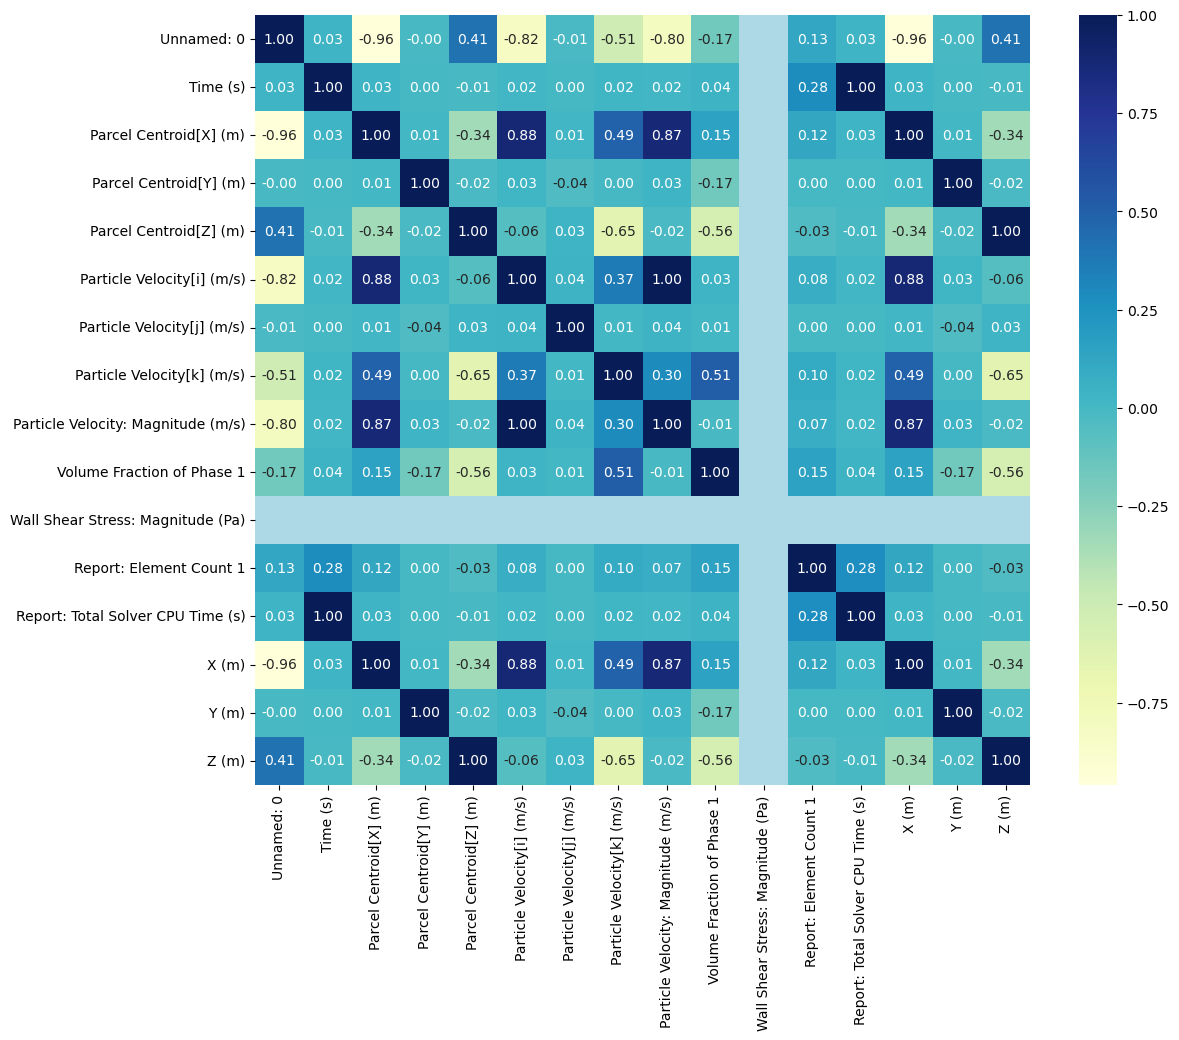

In [7]:
import seaborn as sns

corr_matrix =Granular_flow_data.corr()

fig, ax_corr_Matrix=plt.subplots(figsize=(12.5,10))

color = plt.get_cmap('YlGnBu')   # default color
color.set_bad('lightblue')  

ax =sns.heatmap(corr_matrix, 
                annot=True,
                fmt=".2f",
                cmap=color
               )
fig.savefig('./Correlation_matrix_for_the_data(#30).png', bbox_inches='tight', dpi=1200)

## 2.2 Splitting the data

In [8]:

X=Granular_flow_data.drop(['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)', 'X (m)',	'Y (m)',	'Z (m)'], axis=1)
y= Granular_flow_data[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]


In [9]:
X

,Unnamed: 0,Time (s),Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s),Particle Velocity: Magnitude (m/s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s)
0,0,0.02,0.576229,0.000008,-0.156682,0.597151,0.010824,0.0,1128.0,2.668
1,1,0.02,0.575964,-0.000034,-0.156740,0.596911,0.006975,0.0,1128.0,2.668
2,2,0.02,0.576129,0.000081,-0.156886,0.597108,0.010824,0.0,1128.0,2.668
3,3,0.02,0.576709,-0.000411,-0.155926,0.597417,0.034522,0.0,1128.0,2.668
4,4,0.02,0.576153,0.000033,-0.156845,0.597121,0.010824,0.0,1128.0,2.668
...,...,...,...,...,...,...,...,...,...,...
13438097,7862,9.04,0.988063,-0.005595,-0.011772,0.988149,0.119034,0.0,30746.0,26681.377
13438098,7863,9.04,0.911534,0.009530,0.068215,0.914132,0.159722,0.0,30746.0,26681.377
13438099,7864,9.04,0.963286,0.011837,-0.021977,0.963609,0.119034,0.0,30746.0,26681.377
13438100,7865,9.04,0.914124,0.014848,-0.002953,0.914249,0.119034,0.0,30746.0,26681.377


In [10]:
y

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.113685,0.032540,0.014828
1,-0.113686,0.025651,0.007872
2,-0.113689,0.024866,0.018086
3,-0.113687,0.038670,0.008284
4,-0.113689,0.026663,0.013483
...,...,...,...
13438097,-0.007282,0.035696,0.005896
13438098,-0.014942,0.026426,0.004031
13438099,-0.009485,0.034536,0.004924
13438100,-0.018894,0.035162,0.001725


## 2.3 Checking if there is any missing value in our data
            * If there is any non-numerical value, we perform feature encoding
            * And/ or if there is any missing value, we perform imputation
            * If no missing value, then we continue to building the machine Learning Model

In [11]:
X.isna().sum()

Unnamed: 0                            0
Time (s)                              0
Particle Velocity[i] (m/s)            0
Particle Velocity[j] (m/s)            0
Particle Velocity[k] (m/s)            0
Particle Velocity: Magnitude (m/s)    0
Volume Fraction of Phase 1            0
Wall Shear Stress: Magnitude (Pa)     0
Report: Element Count 1               0
Report: Total Solver CPU Time (s)     0
dtype: int64

In [12]:
y.isna().sum()

Parcel Centroid[X] (m)    0
Parcel Centroid[Y] (m)    0
Parcel Centroid[Z] (m)    0
dtype: int64

# 3.0 Building and Training the Machine Learning Model for our Data

In [13]:
from sklearn.ensemble import RandomForestRegressor

model1 =RandomForestRegressor(n_estimators=90)
model1.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(n_estimators=90)>

In [14]:
%%time

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                   test_size=0.2)

model1.fit(X_train, y_train)

CPU times: total: 2h 47min 5s
Wall time: 2h 47min 20s


RandomForestRegressor(n_estimators=90)

## 3.1 Predicting with our model

In [15]:
y_preds=model1.predict(X_test)
  
y_preds


array([[-0.07377443,  0.03595589,  0.00554639],
       [ 0.0235051 ,  0.02501602,  0.00336942],
       [-0.06954531,  0.03771092,  0.00461849],
       ...,
       [-0.1121747 ,  0.02719028,  0.00088633],
       [-0.08813563,  0.03393633,  0.00946032],
       [-0.02855409,  0.03542349,  0.00697576]])

In [16]:
y_preds=pd.DataFrame(y_preds, columns=['Parcel Centroid[X] (m)',	'Parcel Centroid[Y] (m)',	'Parcel Centroid[Z] (m)'])
y_preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.073774,0.035956,0.005546
1,0.023505,0.025016,0.003369
2,-0.069545,0.037711,0.004618
3,0.024856,0.036296,0.003500
4,-0.035934,0.026787,0.007172
...,...,...,...
2687616,-0.071302,0.025165,0.010225
2687617,-0.048098,0.034441,0.006663
2687618,-0.112175,0.027190,0.000886
2687619,-0.088136,0.033936,0.009460


In [17]:
y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
13327090,-0.073606,0.031286,0.006111
6146933,0.024962,0.023407,0.004229
13203006,-0.066708,0.041352,0.008279
558630,0.027742,0.040348,0.004788
11721179,-0.036798,0.028555,0.006229
...,...,...,...
5645066,-0.071070,0.025340,0.009442
9631950,-0.048285,0.036731,0.007063
2056235,-0.112218,0.023923,0.000509
7734016,-0.088002,0.030855,0.009781


## 3.2 Scoring our model

In [18]:
model1.score(X_train, y_train)

0.9843994022908507

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error, 
          
         }
model1_scores={}

for key,value in metrics.items():
    model1_scores[key]=value(y_test, y_preds)

    
model1_scores

{'r-squared': 0.8890501230240361,
 'Mean absolute error (MAE)': 0.0013733714881667752,
 'Mean squared error(MSE)': 3.994338412677581e-06}

In [20]:
score30_table= pd.DataFrame(model1_scores.values(), index=model1_scores.keys(), columns=["Values"])
score30_table

,Values
r-squared,0.889050
Mean absolute error (MAE),0.001373
Mean squared error(MSE),0.000004


In [21]:
score30_table.to_csv('#30scores.csv')

# 4.0 Plotting the Data
Plotting at the first time-index of the test data This is equivalent to the zeroth index
We can do the same for other indexes

In [22]:
actual_Xi = y_test.iloc[:, :1]
actual_Xj=y_test.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

predicted_Xi = y_preds.iloc[:, :1]
predicted_Xj = y_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


## 4.2 Separate plots of the Actual Granules Position and the Predicted Granules Position

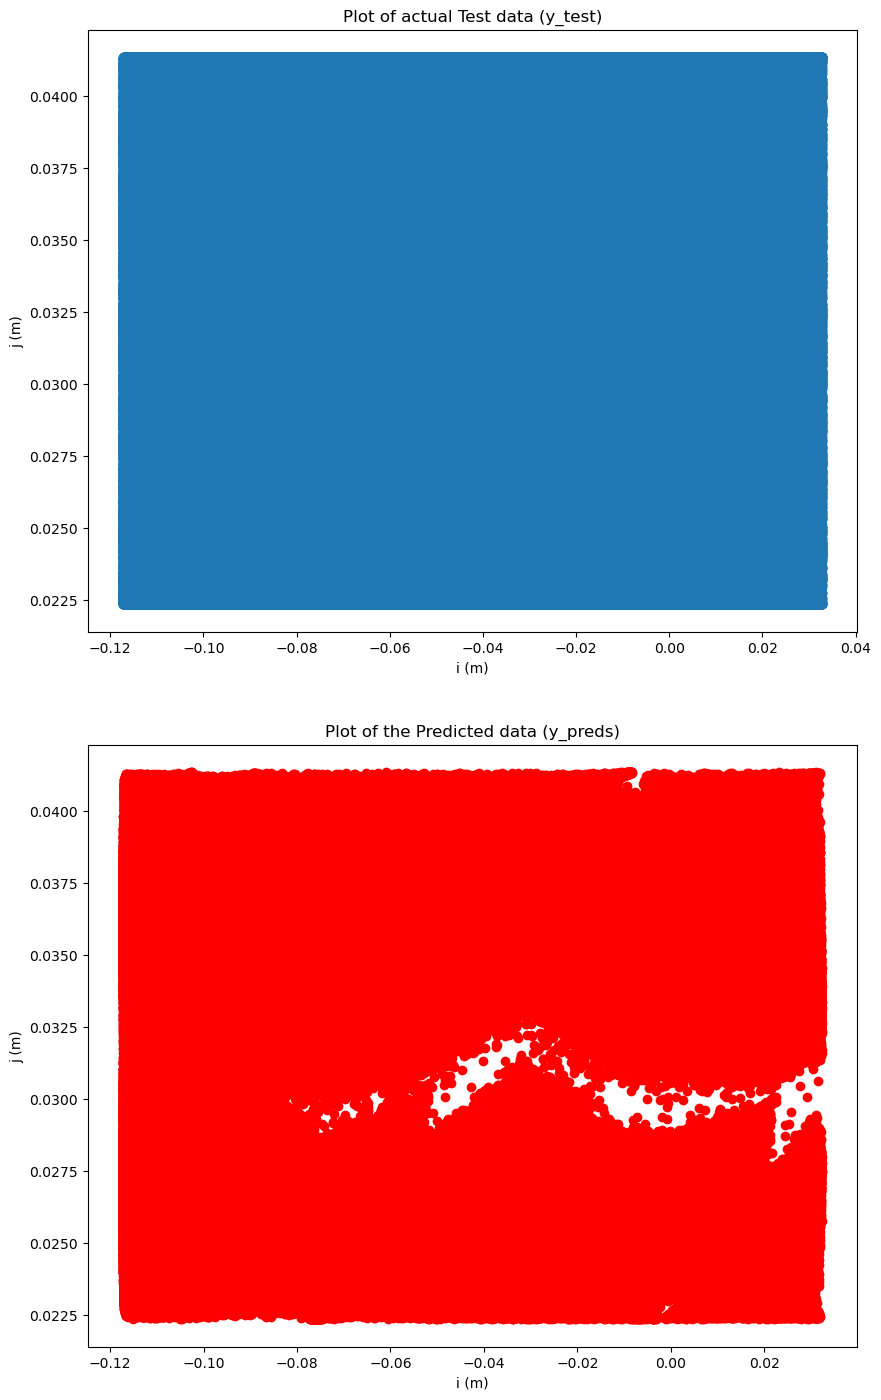

In [23]:
#Plotting the actual and Predicted positions 
# Plot the actual and predicted positions
#plt.scatter(actual_Xi, actual_Xj, color='blue', label='Actual')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,15))

ax1.scatter(actual_Xi, actual_Xj)
ax2.scatter(predicted_Xi, predicted_Xj, color='red')

ax1.set(title="Plot of actual Test data (y_test)", 
              xlabel='i (m)',
              ylabel='j (m)'
             )
fig.tight_layout(pad=5)

ax2.set(title= "Plot of the Predicted data (y_preds)", 
        xlabel= 'i (m)',
        ylabel='j (m)'
       )

plt.savefig("./Separate plots of Actual and Predicted granules Position(#30).png", dpi=1200)

## 4.3 Plotting the Actual Granules Position against the Predicted Granules Position 

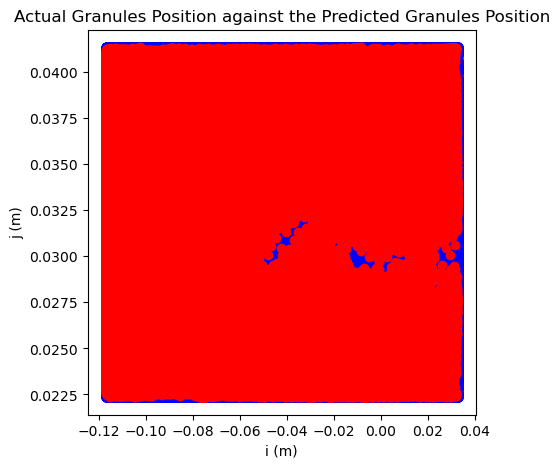

In [24]:
fig, ax3 =plt.subplots(1,1,figsize=(5,5))

ax3.scatter(actual_Xi, actual_Xj, color ='blue')

ax3.scatter(predicted_Xi, predicted_Xj, color='red')

ax3.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted(#30).png', dpi=1200)

In [25]:
## 4.3 Plot of the Actual against the Predicted Granules position of the first 500 granules 

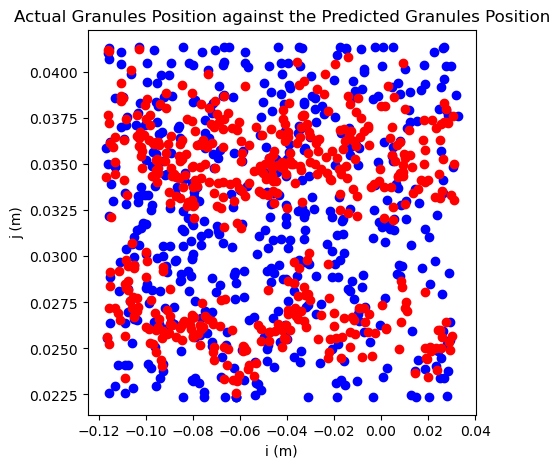

In [26]:
fig, ax4 =plt.subplots(1,1,figsize=(5,5))
plt.scatter(actual_Xi[:500], actual_Xj[:500], color ='blue')
plt.scatter(predicted_Xi[:500], predicted_Xj[:500], color='red')

ax4.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="j (m)")

plt.savefig('./Actual vs Predicted(#30).png', dpi=1200)

# 5.0 Using Linear Regression Model

In [27]:
%%time

from sklearn.linear_model import LinearRegression

model2=LinearRegression()

model2.get_params
model2.fit(X_train, y_train)


CPU times: total: 7.33 s
Wall time: 5.06 s


LinearRegression()

## 5.1 Making Prediction

In [28]:
yLinear_Preds=model2.predict(X_test)
yLinear_Preds

array([[-0.07039147,  0.0313025 ,  0.0062137 ],
       [ 0.01854068,  0.03031715,  0.00319431],
       [-0.06522187,  0.03102615,  0.00618396],
       ...,
       [-0.12128336,  0.03145153,  0.00423175],
       [-0.08568934,  0.03102448,  0.00787432],
       [-0.02774714,  0.03285149,  0.00626231]])

In [29]:
yLinear_Preds=pd.DataFrame(yLinear_Preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yLinear_Preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.070391,0.031302,0.006214
1,0.018541,0.030317,0.003194
2,-0.065222,0.031026,0.006184
3,0.019112,0.032439,0.006436
4,-0.034223,0.031100,0.006053
...,...,...,...
2687616,-0.062682,0.035644,0.012204
2687617,-0.045140,0.031648,0.005977
2687618,-0.121283,0.031452,0.004232
2687619,-0.085689,0.031024,0.007874


In [30]:
 y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
13327090,-0.073606,0.031286,0.006111
6146933,0.024962,0.023407,0.004229
13203006,-0.066708,0.041352,0.008279
558630,0.027742,0.040348,0.004788
11721179,-0.036798,0.028555,0.006229
...,...,...,...
5645066,-0.071070,0.025340,0.009442
9631950,-0.048285,0.036731,0.007063
2056235,-0.112218,0.023923,0.000509
7734016,-0.088002,0.030855,0.009781


## 5.2 Scoring the Linear Regression based model

In [31]:
model2.score(X_train, y_train)

0.5688138702460768

In [32]:
model2.score(X_test, y_test)

0.5691356471977291

In [33]:
model2_scores={}

for key,value in metrics.items():
    model2_scores[key]=value(y_test, yLinear_Preds)

    
model2_scores

score30_table['LinearRegression']= np.array(list(model2_scores.values()))
score30_table

,Values,LinearRegression
r-squared,0.889050,0.569136
Mean absolute error (MAE),0.001373,0.003297
Mean squared error(MSE),0.000004,0.000018


In [34]:
model2_scores

{'r-squared': 0.5691356471977291,
 'Mean absolute error (MAE)': 0.00329673264265629,
 'Mean squared error(MSE)': 1.8064121723003115e-05}

## 5.3 Plots of the Actual vs  Predicted Granule Position Using the Linear Regression Model

In [35]:
LR_Pred_Xi=yLinear_Preds.iloc[:,:1]
LR_Pred_Xj=yLinear_Preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)

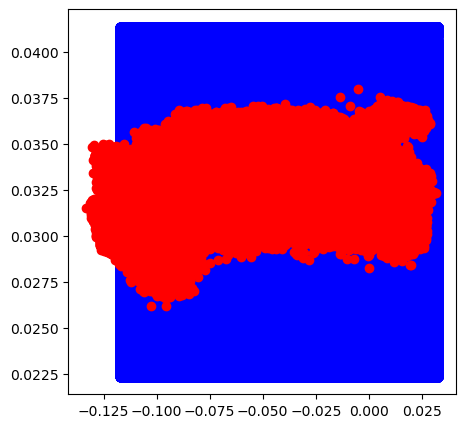

In [36]:
fig, ax5= plt.subplots(figsize=(5,5))

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')

plt.savefig('./LinearRegression_model(#30).png', dpi=1200)

# 6.0 Using Ridge Regression

In [37]:
%%time

from sklearn.linear_model import Ridge

model3= Ridge()

model3.get_params

model3.fit(X_train, y_train)

CPU times: total: 1.17 s
Wall time: 871 ms


Ridge()

In [38]:
yRidge_preds=model3.predict(X_test)
yRidge_preds

array([[-0.07039732,  0.03130217,  0.00621196],
       [ 0.01853016,  0.03031659,  0.00319128],
       [-0.06523033,  0.03102569,  0.00618145],
       ...,
       [-0.12127545,  0.03145207,  0.00423399],
       [-0.08569921,  0.03102388,  0.00787161],
       [-0.02774174,  0.03285175,  0.00626394]])

In [39]:
yRidge_preds=pd.DataFrame(yRidge_preds, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)'])
yRidge_preds

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
0,-0.070397,0.031302,0.006212
1,0.018530,0.030317,0.003191
2,-0.065230,0.031026,0.006181
3,0.019102,0.032438,0.006433
4,-0.034223,0.031100,0.006053
...,...,...,...
2687616,-0.062695,0.035643,0.012200
2687617,-0.045139,0.031648,0.005977
2687618,-0.121275,0.031452,0.004234
2687619,-0.085699,0.031024,0.007872


In [40]:
y_test

,Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Parcel Centroid[Z] (m)
13327090,-0.073606,0.031286,0.006111
6146933,0.024962,0.023407,0.004229
13203006,-0.066708,0.041352,0.008279
558630,0.027742,0.040348,0.004788
11721179,-0.036798,0.028555,0.006229
...,...,...,...
5645066,-0.071070,0.025340,0.009442
9631950,-0.048285,0.036731,0.007063
2056235,-0.112218,0.023923,0.000509
7734016,-0.088002,0.030855,0.009781


In [41]:
model3.score(X_train, y_train)

0.568813742264318

In [42]:
model3.score(X_test, y_test)

0.5691354988471989

In [43]:
model3_scores={}

for key,value in metrics.items():
    model3_scores[key]=value(y_test, yRidge_preds)

    
model3_scores

score30_table['RidgeRegression']= np.array(list(model3_scores.values()))
score30_table

,Values,LinearRegression,RidgeRegression
r-squared,0.889050,0.569136,0.569135
Mean absolute error (MAE),0.001373,0.003297,0.003297
Mean squared error(MSE),0.000004,0.000018,0.000018


## 6.3 Plotting the graph of Actual against Predicted for the Ridge regression Model

In [44]:
RR_preds_Xi= yRidge_preds.iloc[:,:1]
RR_preds_Xj= yRidge_preds.iloc[:, :2].drop('Parcel Centroid[X] (m)', axis =1)


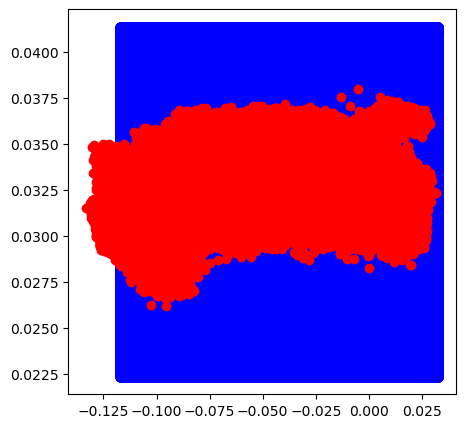

In [45]:
fig, ax6= plt.subplots(figsize=(5,5))

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')

plt.savefig('./Ridge Model plot(#30).png', dpi=1200)

# 7 Using SVR

In [46]:
from sklearn.svm import SVR

model4= SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

model4.get_params

model4.fit(X_train, y_train.iloc[:, 0]) # can not capture the 2D array of y, it can predict for 1D

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [47]:
y_train.iloc[:, 0]

1464342    -0.074121
4371352    -0.012983
7770927    -0.113709
10300805   -0.009313
1887312    -0.042879
              ...   
13315092   -0.026589
4304572     0.020536
10081351    0.030973
6550634    -0.002656
6423388     0.004714
Name: Parcel Centroid[X] (m), Length: 10750481, dtype: float64

In [48]:
y_train.iloc[:, 0].shape

(10750481,)

In [49]:
y_train.shape

(10750481, 3)

In [50]:
model4.score(X_test, y_test.iloc[:,:1])

-0.03289341870504048

In [51]:
ySVR_preds=model4.predict(X_test)
ySVR_preds

array([-0.04226984, -0.04226984, -0.04226984, ..., -0.04226984,
       -0.04226984, -0.04226984])

In [52]:
pd.DataFrame(ySVR_preds)

,0
0,-0.04227
1,-0.04227
2,-0.04227
3,-0.04227
4,-0.04227
...,...
2687616,-0.04227
2687617,-0.04227
2687618,-0.04227
2687619,-0.04227


In [53]:
y_test.iloc[:,0]

13327090   -0.073606
6146933     0.024962
13203006   -0.066708
558630      0.027742
11721179   -0.036798
              ...   
5645066    -0.071070
9631950    -0.048285
2056235    -0.112218
7734016    -0.088002
9659399    -0.030139
Name: Parcel Centroid[X] (m), Length: 2687621, dtype: float64

# 8.0 Comparing all the Regression Models

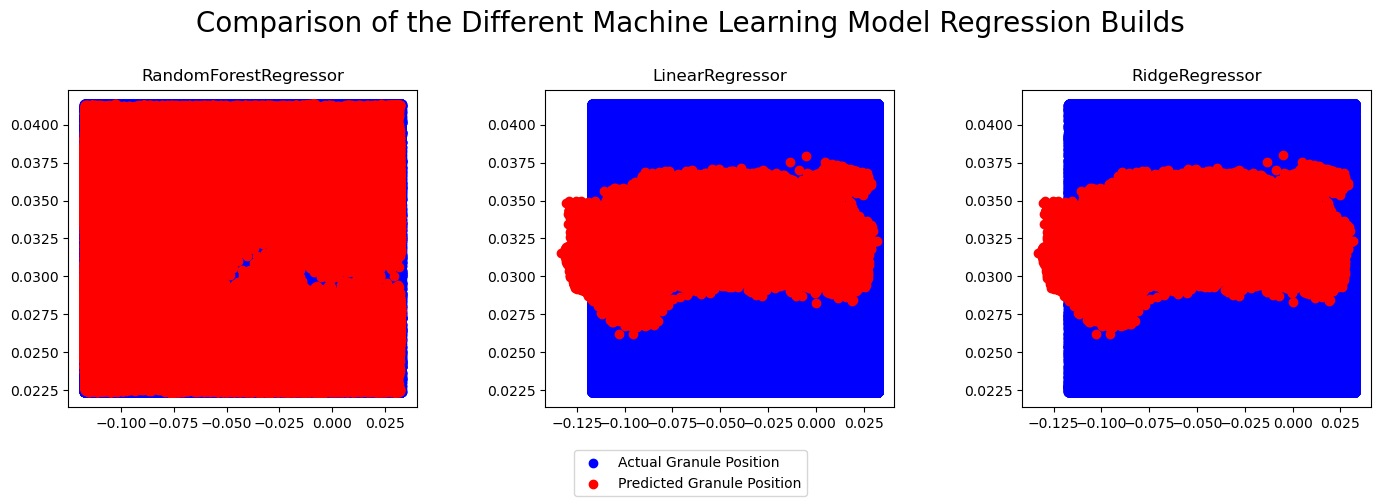

In [54]:
fig, (ax3, ax5, ax6) =plt.subplots(1,3,figsize=(15,5))


l1=ax3.scatter(actual_Xi, actual_Xj, color ='blue')
l2=ax3.scatter(predicted_Xi, predicted_Xj, color='red')
ax3.set(title='RandomForestRegressor')

ax5.scatter(actual_Xi, actual_Xj, color='blue')
ax5.scatter(LR_Pred_Xi, LR_Pred_Xj, color='red')
ax5.set(title='LinearRegressor')

ax6.scatter(actual_Xi, actual_Xj, color='blue')
ax6.scatter(RR_preds_Xi, RR_preds_Xj, color='red')
ax6.set(title='RidgeRegressor')

fig.tight_layout(pad=5.0)
fig.legend(['Actual Granule Position', 'Predicted Granule Position'], loc='lower center')
fig.suptitle('Comparison of the Different Machine Learning Model Regression Builds', fontsize=20)
plt.savefig('./Comparison of the Different Machine Learning Model Regression Builds(#30).png', dpi=1200)

In [55]:
model1_scores={}
model2_scores={}
model3_scores={}

for key,value in metrics.items():
    model1_scores[key]=value(y_test, y_preds)
    model2_scores[key]=value(y_test, yLinear_Preds)
    model3_scores[key]=value(y_test, yRidge_preds)

  


score30_table= pd.DataFrame(model1_scores.values(),  columns=['RandomForestRegression'], index= model1_scores.keys())
score30_table['LinearRegression']= model2_scores.values()
score30_table['RidgeRegression'] = model3_scores.values()

score30_table.to_csv('#30scores.csv')

score30_table

,RandomForestRegression,LinearRegression,RidgeRegression
r-squared,0.889050,0.569136,0.569135
Mean absolute error (MAE),0.001373,0.003297,0.003297
Mean squared error(MSE),0.000004,0.000018,0.000018


# RandomSearchCV

In [56]:
%%time

from sklearn.model_selection import RandomizedSearchCV

RndmFrst_grid={"n_estimators": np.arange(10,100,10),
               "max_depth":[None]
              }

RndmSrch_RndmFrst=RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions= RndmFrst_grid,
                              cv=5,
                              verbose= 10
                             )
RndmSrch_RndmFrst.fit(X_train, y_train)

In [57]:
RndmSrch_RndmFrst.best_params_

In [58]:
%%time

from sklearn.model_selection import GridSearchCV

GridSrch_RndmFrst= GridSearchCV(RandomForestRegressor(),
                                param_grid=RndmFrst_grid,
                                cv=5,
                                verbose=10)
GridSrch_RndmFrst.fit(X_train, y_train)

In [59]:
GridSrch_RndmFrst.best_params_

## Making Use of the RandomizedSearchCV RandomForest Best_params for predicting our data

In [60]:
improved_model1=RandomForestRegressor(90,max_depth=7)
improved_model1

improved_model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=90)

In [61]:
improvedModel_yPreds=improved_model1.predict(X_test)
improvedModel_yPreds

array([[-0.07267902,  0.03613292,  0.00392522],
       [ 0.02567731,  0.02574914,  0.00445926],
       [-0.07236456,  0.0363245 ,  0.00357096],
       ...,
       [-0.11081915,  0.02650605,  0.00371382],
       [-0.08555924,  0.03445608,  0.00839472],
       [-0.02774116,  0.03471457,  0.00674556]])

# Evaluating the tuned model

 *The problem in question is that of regression and not classification, so we need to use the Regression metrics.
    https://scikit-learn.org/stable/modules/model_evaluation.html
    * The metrics used in this study are:
            > R-squared score (r-squared)
            > Mean absolute error (MAE)
            > Mean squared error (MSE)
            > Root mean squared error (RMSE)
            > Max error
            

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error
         }

Improved_model1_scores={}

for key,value in metrics.items():
   Improved_model1_scores[key]= value(y_test, improvedModel_yPreds).astype("float")

Improved_model1_scores

{'r-squared': 0.7999438699983236,
 'Mean absolute error (MAE)': 0.0024720162006707964,
 'Mean squared error(MSE)': 1.1784919615329117e-05}

# Comparing these values with the values obtained before Tuning the Machine learning model

Recalling the score values of both models

In [63]:
model1_scores

{'r-squared': 0.8890501230240361,
 'Mean absolute error (MAE)': 0.0013733714881667752,
 'Mean squared error(MSE)': 3.994338412677581e-06}

In [64]:
Improved_model1_scores

{'r-squared': 0.7999438699983236,
 'Mean absolute error (MAE)': 0.0024720162006707964,
 'Mean squared error(MSE)': 1.1784919615329117e-05}

## Finding the Difference

In [65]:
score_differences=(np.array(list(Improved_model1_scores.values()))-np.array(list(model1_scores.values())))
score_differences

array([-8.91062530e-02,  1.09864471e-03,  7.79058120e-06])

## Showing the difference in a table

In [66]:
pd.DataFrame([score_differences] ,columns=[['R-squared diff','Mean absolute error (MAE) diff' ,'Mean squared error(MSE) diff']])

,R-squared diff,Mean absolute error (MAE) diff,Mean squared error(MSE) diff
0,-0.089106,0.001099,0.000008


# Performing Feature Importance
    Feature importance is a model inspection technique that measures the contribution of each feature to a fitted model's statistical performance on a given tabular dataset .

In [67]:
feature_importance = improved_model1.feature_importances_
feature_importances= feature_importance[:20]

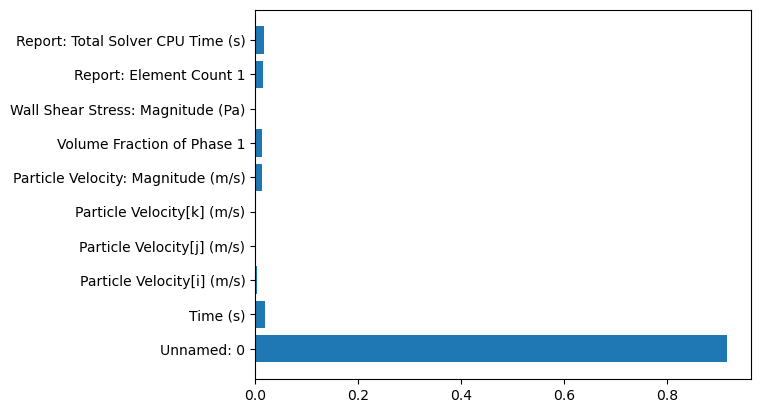

In [68]:
plt.barh( X_train.columns, feature_importances)
plt.savefig('./Graph Showing Feature Importance(#30).pdf', dpi=1200, format= 'pdf')

# Predicting the velocity

In [69]:
U=Granular_flow_data.drop(["Parcel Centroid[X] (m)", "Parcel Centroid[Y] (m)", "Parcel Centroid[Z] (m)", "Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)", "Particle Velocity: Magnitude (m/s)"], axis=1)
U

,Unnamed: 0,Time (s),Volume Fraction of Phase 1,Wall Shear Stress: Magnitude (Pa),Report: Element Count 1,Report: Total Solver CPU Time (s),X (m),Y (m),Z (m)
0,0,0.02,0.010824,0.0,1128.0,2.668,-0.113685,0.032540,0.014828
1,1,0.02,0.006975,0.0,1128.0,2.668,-0.113686,0.025651,0.007872
2,2,0.02,0.010824,0.0,1128.0,2.668,-0.113689,0.024866,0.018086
3,3,0.02,0.034522,0.0,1128.0,2.668,-0.113687,0.038670,0.008284
4,4,0.02,0.010824,0.0,1128.0,2.668,-0.113689,0.026663,0.013483
...,...,...,...,...,...,...,...,...,...
13438097,7862,9.04,0.119034,0.0,30746.0,26681.377,-0.007282,0.035696,0.005896
13438098,7863,9.04,0.159722,0.0,30746.0,26681.377,-0.014942,0.026426,0.004031
13438099,7864,9.04,0.119034,0.0,30746.0,26681.377,-0.009485,0.034536,0.004924
13438100,7865,9.04,0.119034,0.0,30746.0,26681.377,-0.018894,0.035162,0.001725


In [70]:
U["Wall Shear Stress: Magnitude (Pa)"].describe()

count    13438102.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max             0.0
Name: Wall Shear Stress: Magnitude (Pa), dtype: float64

In [71]:
v=Granular_flow_data[["Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)"]]
v

,Particle Velocity[i] (m/s),Particle Velocity[j] (m/s),Particle Velocity[k] (m/s)
0,0.576229,0.000008,-0.156682
1,0.575964,-0.000034,-0.156740
2,0.576129,0.000081,-0.156886
3,0.576709,-0.000411,-0.155926
4,0.576153,0.000033,-0.156845
...,...,...,...
13438097,0.988063,-0.005595,-0.011772
13438098,0.911534,0.009530,0.068215
13438099,0.963286,0.011837,-0.021977
13438100,0.914124,0.014848,-0.002953


In [72]:
%%time

U_train, U_test, v_train, v_test=train_test_split(U,v,
                                                  test_size=0.2, 
                                                  random_state=42)

velocity_model1= RandomForestRegressor(n_estimators=200)
velocity_model1.fit(U_train, v_train)

MemoryError: could not allocate 939524096 bytes

In [73]:
velocity_model1.score(U_test, v_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:1009: RuntimeWarning: invalid value encountered in divide
  y_hat /= len(self.estimators_)


ValueError: Input contains NaN.

# Using Multi-layer Percerptron Regressor (MLP Regressor)

In [ ]:
%%time

from sklearn.neural_network import MLPRegressor


MLP= MLPRegressor(random_state=42)

MLP.fit(U_train, v_train)

In [ ]:
MLP.score(X=U_test,y=v_test)

In [ ]:
from datetime import datetime


print(f"This notebook code was last run on {datetime.now()}")

## Exporting the y_test and the RandomForestRegressor Predicted data (y_preds)

In [ ]:
test_n_predicted_data=pd.DataFrame(np.array(y_test), columns=['y_test(i)','y_test(j)', 'y_test(k)'])

test_n_predicted_data[['y_preds(i)', 'y_preds(j)', 'y_preds(k)']]=np.array(y_preds)

test_n_predicted_data.to_csv('./test_n_predicted_data(#30).csv', index=False)

test_n_predicted_data

## Difference Between the y_test (Actual data) and the y_preds (Predicted Data )

In [ ]:
dataDifference = np.array(y_test)-np.array(y_preds)
df_dataDifference=pd.DataFrame(dataDifference, columns=['y_test(i) - y_preds(i)', 'y_test(j) - y_preds(j)', 'y_test(k) - y_preds(k)'])
df_dataDifference

*The dataDifference is approximately equal to zero, this is better seen when the values are rounded to 3 decimal places as shown below


In [ ]:
df_dataDifference.round(3)

## Exporting the dataDifference

In [ ]:
df_dataDifference.to_csv('difference btw y_test and y_preds(#30).csv', index=False)

## Exporting the Training Data (X_train and y_train)

In [ ]:
TrainingData = X_train
TrainingData[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]=y_train
TrainingData

In [ ]:
TrainingData.to_csv('./Training_Data(#30).csv', index=False)

## Exporting X_test

In [ ]:
Xtest=X_test
Xtest.to_csv('./X_test(#30).csv')

In [ ]:
## Exporting y_test
Ytest=y_test
Ytest.to_csv('./y_test(#30).csv')

## Exporting both X_test and y_test as a combined file

In [ ]:
Xtest[['Parcel Centroid[X] (m)', 'Parcel Centroid[Y] (m)', 'Parcel Centroid[Z] (m)']]=Ytest
Xtest.to_csv('./X_test and y_test(#30).csv')

## Saving the model as a file

In [ ]:
import pickle
import joblib

saved_RndmFrst_model30 =pickle.dumps(model1)

joblib.dump(model1, './saved_RandomFrstRegresor_model30.pkl') #RandomForestRegressor
joblib.dump(model2, './saved_LinearRegrsor_model30.pkl') #LinearRegressor
joblib.dump(model3, './saved_RidgeRegrsor_model30.pkl') #RidgeRegressor